In [65]:
import pandas as pd
df_att=pd.read_excel('./Jammer/Attacker.xlsx',sheet_name='1OBU')
df_nom=pd.read_excel('./Normal/Normal.xlsx',sheet_name='1OBU')

In [66]:
df_att.columns=df_att.iloc[0]
df_att.drop(index=df_att.index[0], axis=0, inplace=True)
df_att.drop(df_att.columns[0], axis=1, inplace=True)
df_att.drop(df_att.iloc[: , 11:15], axis=1, inplace=True)
df_att = df_att.head(30)

In [67]:
df_att.head()

,RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),CAR Intended-Tx,Car-Btx-RSU,RSU P-Received,RSU-PDR (%)
1,10,10,100,1,10,55,-48.672344,10,10,1,10
2,10,10,100,0,0,50,-44.676311,10,10,1,10
3,10,8,80,1,12.5,46.25,-46.052743,10,10,0,0
4,10,10,100,0,0,50,-45.159092,10,10,1,10
5,10,10,100,1,10,55,-46.319235,10,10,1,10


In [68]:
df_nom.columns=df_nom.iloc[0]
df_nom.drop(index=df_nom.index[0], axis=0, inplace=True)
df_nom.drop(df_nom.columns[0], axis=1, inplace=True)
df_nom.drop(df_nom.iloc[: , 11:31], axis=1, inplace=True)
df_nom = df_nom.head(30)

In [69]:
df_nom.head()

,RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU-PDSR (%),CAR Intended-Tx,Car-Btx-RSU,Car-PSR (%),RSU P-Received,RSU-PDR (%)
1,10,0,0,0,0,0,10,0,0,0,0
2,10,10,100,10,100,100,10,9,90,9,100
3,10,10,100,10,100,100,10,9,90,7,77.777778
4,10,10,100,10,100,100,10,10,100,10,100
5,10,10,100,10,100,100,10,10,100,9,90


In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

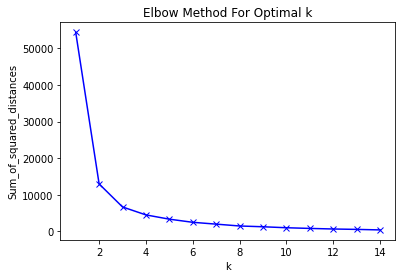

In [71]:
df_att1=df_att
cluster = []
K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean = kmean.fit(df_att1)
    cluster.append(kmean.inertia_)
plt.plot(K, cluster, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/home/mivin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


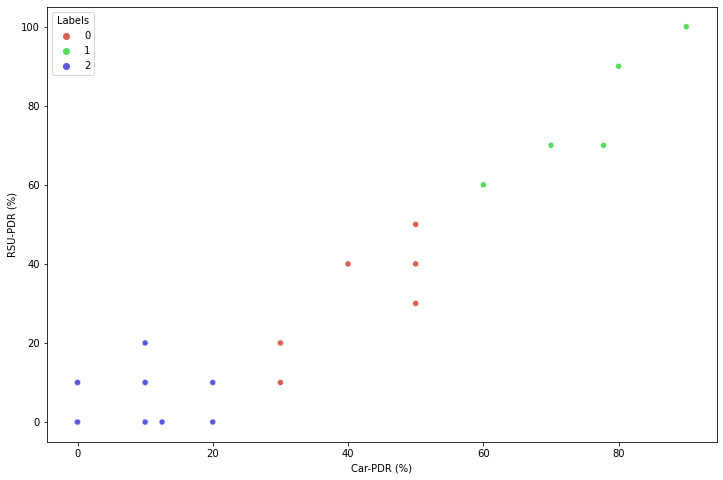

In [72]:
km = KMeans(n_clusters=3).fit(df_att1)

df_att1['Labels'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(df_att1['Car-PDR (%)'], df_att1['RSU-PDR (%)'], hue=df_att1['Labels'], palette=sns.color_palette('hls', 3))
plt.show()

In [73]:
df_nom2=df_nom
df_nom2.head()

,RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU-PDSR (%),CAR Intended-Tx,Car-Btx-RSU,Car-PSR (%),RSU P-Received,RSU-PDR (%)
1,10,0,0,0,0,0,10,0,0,0,0
2,10,10,100,10,100,100,10,9,90,9,100
3,10,10,100,10,100,100,10,9,90,7,77.777778
4,10,10,100,10,100,100,10,10,100,10,100
5,10,10,100,10,100,100,10,10,100,9,90


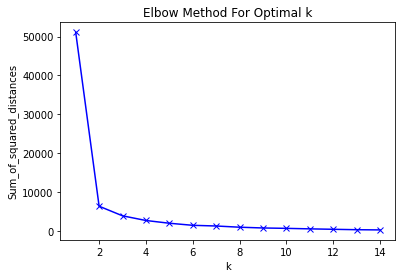

In [74]:
cluster = []
K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean = kmean.fit(df_nom2)
    cluster.append(kmean.inertia_)
plt.plot(K, cluster, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/home/mivin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


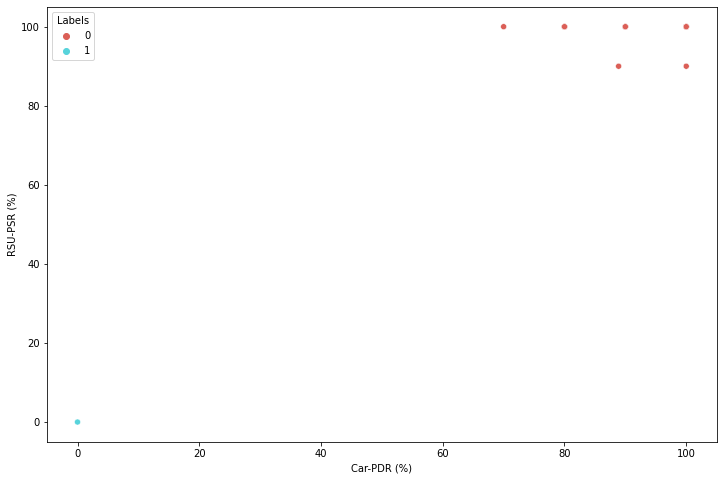

In [75]:
km = KMeans(n_clusters=2).fit(df_nom2)

df_nom2['Labels'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(df_nom2['Car-PDR (%)'], df_nom2['RSU-PSR (%)'], hue=df_nom2['Labels'], palette=sns.color_palette('hls', 2))
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering
hie_clus=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_clus.fit(df_att1)

AgglomerativeClustering(n_clusters=3)

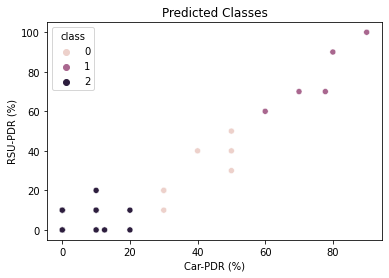

In [77]:
df_att1['class'] = hie_clus.labels_
plt.title('Predicted Classes')
sns.scatterplot(data=df_att1,x='Car-PDR (%)', y='RSU-PDR (%)', hue='class')
plt.show()

In [78]:
hie_clus=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hie_clus.fit(df_nom2)

AgglomerativeClustering()

In [79]:
df_nom2['class'] = hie_clus.labels_

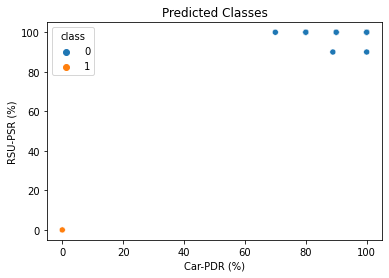

In [80]:
plt.title('Predicted Classes')
sns.scatterplot(data=df_nom2,x='Car-PDR (%)', y='RSU-PSR (%)', hue='class')
plt.show()

In [81]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

kmeans_model = KMeans(n_clusters = 3, random_state = 1).fit(df_att1)
labels = kmeans_model.labels_
silhouette_score(df_att1, labels, metric = 'manhattan')

0.6036474906523533

In [82]:
kmeans_model = KMeans(n_clusters = 3, random_state = 1).fit(df_nom2)
labels = kmeans_model.labels_
silhouette_score(df_nom2, labels, metric = 'manhattan')

0.46961224065942336